In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [4]:
df= pd.read_csv('../ML/exams - exams.csv')

In [6]:
df

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [8]:
X = df[['exam_1', 'exam_2']]
y = df['admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)


In [10]:
X_train

,exam_1,exam_2
43,82.368754,40.618255
62,56.253817,39.261473
3,60.182599,86.308552
71,64.039320,78.031688
45,62.222676,52.060992
...,...,...
96,42.261701,87.103851
67,49.072563,51.883212
64,44.668262,66.450086
47,97.771599,86.727822


In [12]:
X_test

,exam_1,exam_2
26,80.190181,44.821629
86,42.075455,78.844786
2,35.847409,72.902198
55,49.586677,59.808951
75,99.827858,72.369252
93,74.492692,84.845137
16,69.070144,52.740470
73,60.457886,73.094998
54,50.286496,49.804539
95,83.489163,48.380286


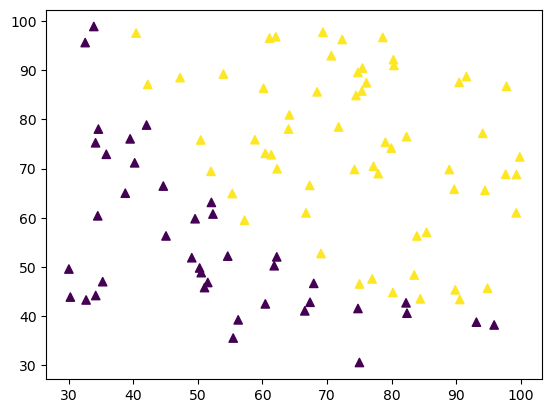

In [66]:
import matplotlib.pyplot as plt

plt.scatter(df['exam_1'], df['exam_2'], c = df['admitted'], marker = '^')

In [15]:
import numpy as np 
import random

class LogisticRegression:
    def __init__(self, alpha = 0.1, n_iterations = 10000, normalize = True):
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.coef_ = None
        self.normalize = normalize
        self.bias = None
        self.costs = []

    def costFunction(self, Y, h):
        h = np.clip(h, 1e-10, 1 - 1e-10)  
        return (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()

    def sigmoid (self, z):
        res = 1.0 / (1+np.exp(-z))
        return res
    
    def predict_proba(self,X):
        if self.normalize == True:
            X = (X - self.min_) / (self.max_ - self.min_)
            
        val = np.dot(X, self.coef_) + self.bias
        p = self.sigmoid(val)
        return p
    
    def predict(self, X):
        val = self.predict_proba(X)
        
        val [val >= 0.5] = 1
        val [val  < 0.5]  = 0
        
        return val
        
    def _standardize(self, X):
        self.min_ = np.array(X.min(axis=0))
        self.max_ = np.array(X.max(axis=0))
        # self.std_[self.std_ == 0] = 1  
        return (X - self.min_) / (self.max_ - self.min_)
        
    def fit(self, X, Y):
        if self.normalize == True:
            X = self._standardize(X)
            
        X_ = np.c_[np.ones(len(X)), X]
        w  = np.array([random.randint(1, 100)] * X_.shape[1])
        for i in range(self.n_iterations):
            z = X_.dot(w)
            h = self.sigmoid(z)
            if i % 100 == 0:
                self.costs.append( self.costFunction(Y, h))
                         
            g = np.dot(X_.T, h - Y) / len(Y)
            w = w - self.alpha * g
            
        self.coef_ = w[1:]
        self.bias = w[0]

In [98]:
model = LogisticRegression(normalize = True)

In [101]:
model.fit(X_train, y_train)

In [102]:
6.08078976e-10

6.08078976e-10

In [103]:
model.predict_proba([[10, 10]])

array([5.21374316e-13])

In [104]:
model.predict([[45, 30], [63,76]])

array([0., 1.])

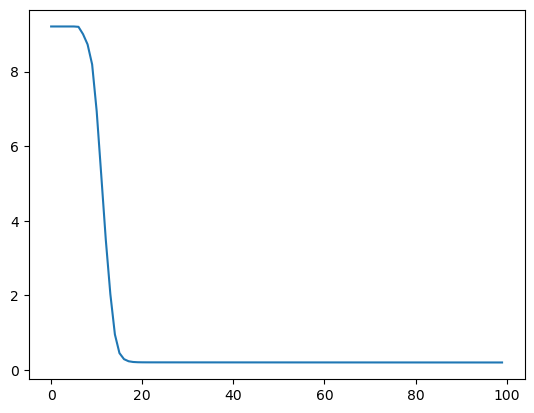

In [105]:
plt.plot(model.costs)

In [74]:
X_test

,exam_1,exam_2
26,80.190181,44.821629
86,42.075455,78.844786
2,35.847409,72.902198
55,49.586677,59.808951
75,99.827858,72.369252
93,74.492692,84.845137
16,69.070144,52.740470
73,60.457886,73.094998
54,50.286496,49.804539
95,83.489163,48.380286


In [76]:
y_test

26    1
86    0
2     0
55    0
75    1
93    1
16    1
73    1
54    0
95    1
53    0
92    0
78    0
13    1
7     1
30    1
22    0
24    1
33    1
8     1
Name: admitted, dtype: int64

In [78]:
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix 

In [82]:
accuracy_score(y_pred, y_test)

0.8

In [115]:
precision_score(y_pred, y_test)

0.6666666666666666

In [113]:
recall_score( y_test, y_pred)

0.6666666666666666

In [46]:
2 * 0.6666666666666666 * 1 / (1 + 0.6666666666666666)

0.8

In [49]:
2 * 0.75 * 0.9 / (0.75 + 0.9)

0.8181818181818182

In [117]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80        12
         1.0       0.67      1.00      0.80         8

    accuracy                           0.80        20
   macro avg       0.83      0.83      0.80        20
weighted avg       0.87      0.80      0.80        20



In [53]:
confusion_matrix(y_pred,y_test)

array([[8, 4],
       [0, 8]], dtype=int64)

In [55]:
len(X_test)

20